使用sigmoid激活函式來訓練(-1~1)範圍內進行"乘上-1"的神經網路

# Include

In [1]:
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, losses
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import matplotlib.pyplot as plt

2022-04-20 18:16:31.499721: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


# Model

In [3]:
input_1 = keras.Input(shape=(1, ))
output_1 = layers.Dense(1, activation='sigmoid')(input_1)
model = keras.Model(inputs=[input_1], outputs=[output_1])
model.summary()
model.compile(optimizer="adam", loss="mse")
# model.compile(optimizer=optimizers.Adam(0.001), loss=losses.MeanSquaredError())
print(model.get_weights())
# plot_model(model, show_shapes=True)

2022-04-20 18:16:33.751020: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-04-20 18:16:33.814639: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:3b:00.0 name: Quadro RTX 6000 computeCapability: 7.5
coreClock: 1.62GHz coreCount: 72 deviceMemorySize: 22.17GiB deviceMemoryBandwidth: 581.23GiB/s
2022-04-20 18:16:33.816063: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:d8:00.0 name: Quadro RTX 6000 computeCapability: 7.5
coreClock: 1.62GHz coreCount: 72 deviceMemorySize: 22.17GiB deviceMemoryBandwidth: 581.23GiB/s
2022-04-20 18:16:33.816101: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-04-20 18:16:33.819662: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-04

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
[array([[-1.588365]], dtype=float32), array([0.], dtype=float32)]


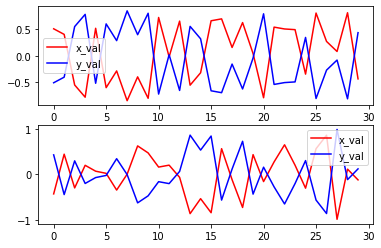

In [4]:
num = 1000
x_train = np.random.rand(num) * 2 - 1
y_train = x_train * -1
x_val = np.random.rand(num) * 2 - 1
y_val = x_val * -1
plt.subplot(211)
plt.plot(x_train[:30], color='r', label='x_val')
plt.plot(y_train[:30], color='b', label='y_val')
plt.legend()
plt.subplot(212)
plt.plot(x_val[:30], color='r', label='x_val')
plt.plot(y_val[:30], color='b', label='y_val')
plt.legend()
plt.show()

In [5]:
model_dir = 'models'
callbacks = list()
''' EarlyStopping '''
callbacks.append(
    keras.callbacks.EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
)
''' ModelCheckpoint '''
# model_name = 'epoch_{epoch:03d}-val_loss_{val_loss:.3f}.hdf5'
# filepath = os.path.join(model_dir, model_name)
# callbacks.append(
#     keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', save_freq='epoch')
# )
''' TensorBoard '''
# log_dir = os.path.join(model_dir, 'log')
# callbacks.append(
#     keras.callbacks.TensorBoard(log_dir=log_dir)
# )
''' trainParam '''
batch_size = 64
epochs = 10000

# Train

In [6]:
trainHistory = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

2022-04-20 18:16:40.307604: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-04-20 18:16:40.328128: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2300000000 Hz


Epoch 1/10000


2022-04-20 18:16:40.597231: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11


 9/16 [===============>..............] - ETA: 0s - loss: 0.3983 

2022-04-20 18:16:41.410606: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


16/16 [==============================] - 1s 15ms/step - loss: 0.3897 - val_loss: 0.4047
Epoch 2/10000
16/16 [==============================] - 0s 12ms/step - loss: 0.3852 - val_loss: 0.4002
Epoch 3/10000
16/16 [==============================] - 0s 6ms/step - loss: 0.3808 - val_loss: 0.3958
Epoch 4/10000
16/16 [==============================] - 0s 4ms/step - loss: 0.3765 - val_loss: 0.3914
Epoch 5/10000
16/16 [==============================] - 0s 8ms/step - loss: 0.3722 - val_loss: 0.3872
Epoch 6/10000
16/16 [==============================] - 0s 5ms/step - loss: 0.3680 - val_loss: 0.3831
Epoch 7/10000
16/16 [==============================] - 0s 7ms/step - loss: 0.3640 - val_loss: 0.3791
Epoch 8/10000
16/16 [==============================] - 0s 10ms/step - loss: 0.3600 - val_loss: 0.3752
Epoch 9/10000
16/16 [==============================] - 0s 4ms/step - loss: 0.3561 - val_loss: 0.3714
Epoch 10/10000
16/16 [==============================] - 0s 10ms/step - loss: 0.3524 - val_loss: 0.3676

[array([[-6.0302978]], dtype=float32), array([-3.0855248], dtype=float32)]


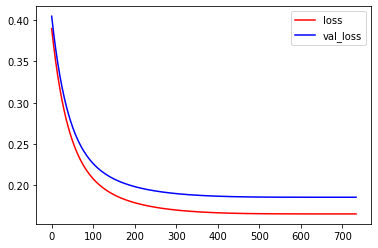

In [7]:
print(model.get_weights())
plt.plot(trainHistory.history['loss'], color='r', label='loss')
plt.plot(trainHistory.history['val_loss'], color='b', label='val_loss')
plt.legend()
plt.show()

# Test

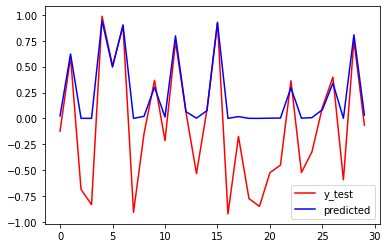

 0.123,  0.023, ads_diff =  0.146
-0.595,  0.622, ads_diff =  0.027
 0.685,  0.001, ads_diff =  0.686
 0.833,  0.000, ads_diff =  0.834
-0.987,  0.943, ads_diff = -0.044
-0.508,  0.496, ads_diff = -0.012
-0.890,  0.904, ads_diff =  0.014
 0.908,  0.000, ads_diff =  0.908
 0.149,  0.020, ads_diff =  0.169
-0.368,  0.302, ads_diff = -0.067
 0.215,  0.014, ads_diff =  0.228
-0.743,  0.797, ads_diff =  0.055
-0.058,  0.065, ads_diff =  0.007
 0.533,  0.002, ads_diff =  0.535
-0.085,  0.075, ads_diff = -0.010
-0.930,  0.922, ads_diff = -0.008
 0.923,  0.000, ads_diff =  0.923
 0.174,  0.017, ads_diff =  0.192
 0.775,  0.001, ads_diff =  0.775
 0.850,  0.000, ads_diff =  0.850
 0.524,  0.002, ads_diff =  0.526
 0.452,  0.003, ads_diff =  0.455
-0.363,  0.296, ads_diff = -0.068
 0.523,  0.002, ads_diff =  0.525
 0.324,  0.007, ads_diff =  0.331
-0.107,  0.085, ads_diff = -0.023
-0.398,  0.340, ads_diff = -0.058
 0.592,  0.001, ads_diff =  0.594
-0.753,  0.807, ads_diff =  0.054
 0.066,  0.032

In [38]:
num = 1000
x_test = np.random.rand(num) * 2 - 1
y_test = x_test * -1
predicted = model.predict(x_test)
plt.plot(y_test[:30], color='r', label='y_test')
plt.plot(predicted[:30], color='b', label='predicted')
plt.legend()
plt.show()
for i in range(100):
    print(f'{x_test[i]:6.3f}, {predicted[i, 0]:6.3f}, ads_diff = {predicted[i, 0] + x_test[i]:6.3f}')